<a href="https://colab.research.google.com/github/Mahi200728/CareerPath/blob/main/JM_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?


Elpd_loo defintely still means something if there is only one model. Elpd_loo essentialy just measures how a model predicts new data. It takes predictive accuracy and complexity to show better performance. So using elpd_loo for one model will allow us to see how our model is working on new data. This allows us to gauge how reliable and generalizable our model is.



---



**Task2**:

Describe overfitting, in the context of this course

Overfitting is essenrially when a model is focused on training data and ignores other general data/patterns that apply to the real world. This leads a model to work well on training data but not when used in the real world. It can mainly happen when a model has too many parameters that lead it to fit well for the training data but not other types of data. We can mainly tell when overfitting occurs when we see the model performs well with training data but fails with new data sets.



---



**Task3**:

How do we mitigate overfitting?

The main way we can mitigate overfitting is by having more data so that the model can gain a better understanding of real world patterns instead of having it focus on anomilies. Another way is to have priors because it will allow is to orient the model to focus on real world solutions not just the first solution that fits the training data.





---



**Task4**:

How do we mitigate underfitting?

Underfitting is essentially the opposite of overfitting where a model is too simple to actually process the patterns presented by the data. We can tell this occurs when the model fails with both the training data and new data because it hasn't learned enough. To mitigate it I would create a more complex model that is better equiped to handle the complexities of the data presented. Also by including more data it allows the model to learn a more from a widerselection.



---



**Task5**:

Why would we want more than one predictor in a model?

We would want more than more predictor in a model so that we can better mimic the real world. Most real world data is influenced by a multitude of factors and so by including more than one predictir we can under the relationships within the data more. It also helps imporve accurancy because having only one can ignore certain varations that are present in the data. It also helps with training the data to ensure it doesn't become biased and can better grasp all the influencing factors.



---



**Task6**:

Can we have too many predictors? How would we now?

Yea we definetly can have too many predictors. We know we have too many if the model works well with the training data but then doesn't work with new data. Also if there are huge changes in teh output when we only tweak the inpit we know that the cause might be too many predictors. This is also one of the main reasons that leads to overfitting.



---



**Task7**:

What is variable selection, and how does it work?

Variable selection is when we choose which variable we include in our model and which one we don't. If done correctly it helps us imporve accuracy of the model by focusing on the important parts of the data and it helps prevent overfitting. It essentially works by allowing us to evaluate each varaible seperatly from its data to show us which one would work best with the model.



---



**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**Standard:** By adding the variable in the model as a standard ot allows us to include other variables (both continous and categroical) into the model. This is diffent than the other models becayse this assumes that the variables don't affect each other.

**Using categroical variable:** Since we know we have a continous variable we know that it could change depending on the category. So we would use a categorical variable if we think that the affect of the variable is different between each category. This is differnt than the first one becayse ut assumes that continous variable is impacted depending on the category.

**Adding variables:** In this one we work with categprical and continous variables together so we look at their combined effect. This would be more effective when we think that the variables together is important. This has the same difference from the first one but it is also different than teh second one becayse it focuses on the combined effect not just each type of variable and its effect.




---



**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We visualize multiple linear regression models by making interaction plots. This shows the relationship between one predictor and the outcome. We can also use residual plots which shows the difference between the observed data and the models predictions. It is really hard to visualize the model because they are typically super complex with the number of predictors we use. It technically can be done but it won't mean much because of how complex the graph would be.



---



**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).



You may use the following two code blocks to load and clean the data.

In [1]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [4]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [5]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

ERROR:pymc.stats.convergence:There were 39 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [7]:
ft_pos_3pt_inter = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

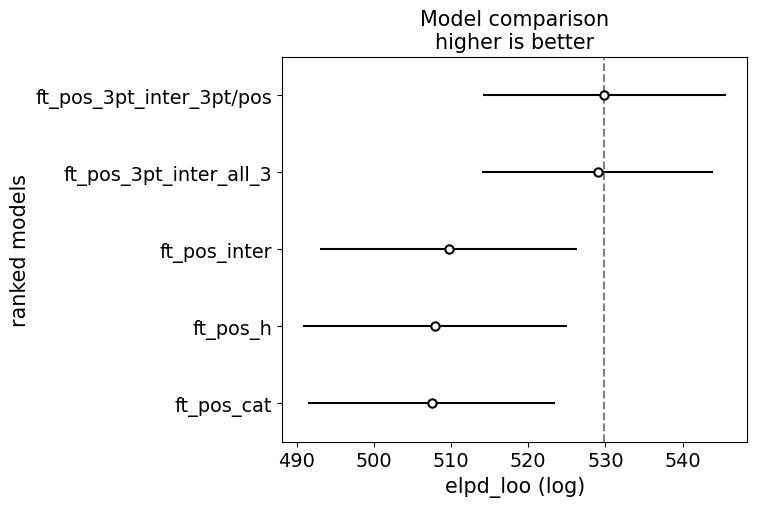

In [9]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

I think the model that includes the 3 point attempts is the best because between the two three point attempt midels it is the only one that shows the interaction between 3PA and Pos rather than showing the interactions between all the predictors. It most likely works the best becayse it takes into account all the 3 point attempts and how that correlates with each players position which is super important. Someone who typically plays shooting guard will shoot more three pointers than someone who plays small forward. This also lets us take into account skill level as someone who attempts a lot of three pointers is more likely to be good at it making them more successful than the others.